# Preamble:
Title: Goals Per Season by Top Scorer Since 1888

Author: Antonio Lopez

Email: alope151 at msudenver.edu

Last Update: 2021-09-27

# Introduction:
This project uses data scraping techinques with the Beautiful Soup 4 library to collect data from football (soccer) stats tracker https://www.worldfootball.net/top_scorer/eng-premier-league/. The purpose of the project is to produce a statistical analysis report of the number of goals scored each season by the top scorer of the English Premier League.

# Dataset
Web scraping was used to collect the data from the World Football website. Analysing a league's top goal scorer is a good way to understand the relative competitiveness of a league for any particular season. As the disparity in talent gets smaller, more consistent numbers are seen as well as multiple players achieving the top scorer accomplishment. In order to produce consistent data, only one player was counted as top scorer every season to not create abnormalities in the data.

Once the data is collected and cleaned up, it is output to a json fail in this format:  
[  
    {"Season": "2020/2021", "Player": "Harry Kane", "Team": "Tottenham Hotspur", "Goals": "23"},  
    {"Season": "2019/2020", "Player": "Jamie Vardy", "Team": "Leicester City", "Goals": "23"},  
    etc...  
]

In [2]:
# CS390Z - Introduction to Data Minining - Fall 2021
# Instructor: Thyago Mota
# Author: Antonio Lopez
# Description: Data Collection

from bs4 import BeautifulSoup
import requests
import json

# definitions/parameters
DATA_FOLDER = './data/'
DATASET_NAME = 'goal_count.json'
BASE_URL = 'https://www.worldfootball.net/top_scorer/eng-premier-league/'
HEADERS = {"User-Agent": "Mozilla/5.0 (X11; CrOS x86_64 12871.102.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.141 Safari/537.36"}

data = []
elements = []

# Data collection
if __name__ == "__main__":

  result = requests.get(BASE_URL, headers=HEADERS)
  if result.status_code == 200:
    soup = BeautifulSoup(result.content, 'html.parser')
    divs = soup.find_all('div', class_='data')
    for div in divs:
        rows = div.find_all('tr')
        for row in rows:
            for element in row:
                element = element.get_text()
                element = element.replace('\n', '')
                if element != '':
                    elements.append(element)
            if len(elements) == 4 and elements[0] != 'Season':
                data.append({'Season': elements[0], 'Player': elements[1], 'Team': elements[2],'Goals': elements[3]})
            elements.clear()

# Dumps data to json file
with open(DATA_FOLDER + DATASET_NAME, 'wt') as json_file:
  json.dump(data, json_file)

# keep for testing output
# print(data)

# Summary Statistics

In [4]:
# CS390Z - Introduction to Data Minining - Fall 2021
# Instructor: Thyago Mota
# Author: Antonio Lopez
# Description: Summary Statistics

import json
import numpy as np

# definitions/parameters
DATA_FOLDER = './data/'
DATASET_NAME = 'goal_count.json'


with open(DATA_FOLDER + DATASET_NAME, 'rt') as json_file:
  seasons = json.load(json_file)

goals = []
for season in seasons:
  goals.append(season['Goals'])
goals_array = np.array(goals).astype(int)

print('*** Summary Statistics (Goals per Season) ***')
print(f'Seasons: {len(goals)}')
print(f'GPS range: [{np.min(goals_array)},{np.max(goals_array)}]')
print('GPS mean: {:.2f}'.format(np.mean(goals_array)))
print('GPS median: {:.2f}'.format(np.median(goals_array)))
print('GPS std: {:.2f}'.format(np.std(goals_array)))

*** Summary Statistics (Goals per Season) ***
Seasons: 122
GPS range: [18,60]
GPS mean: 28.99
GPS median: 28.00
GPS std: 6.83


# Visualizations

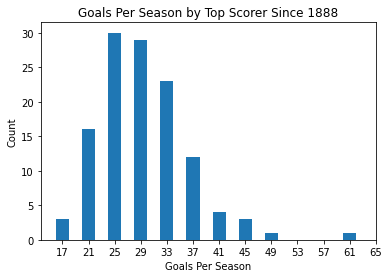

In [5]:
# CS390Z - Introduction to Data Minining - Fall 2021
# Instructor: Thyago Mota
# Author: Antonio Lopez
# Description: Histogram

import matplotlib.pyplot as plt 
import json

# definitions/parameters
DATA_FOLDER = './data/'
DATASET_NAME = 'goal_count.json'

with open(DATA_FOLDER + DATASET_NAME, 'rt') as json_file:
  data = json.load(json_file)

goals = []
for elements in data:
  goals.append(int(elements['Goals']))

bins = list(range(15, 65, 4))
counts, bins, _ = plt.hist(
    goals, 
    bins=bins, 
    rwidth=.5
)
xticks = [2 + x for x in bins]
axes = plt.gca() # get a reference to the plot's axes
axes.set_xticks(xticks)
plt.xlabel('Goals Per Season')
plt.ylabel('Count')
plt.title('Goals Per Season by Top Scorer Since 1888')
plt.show()

*** Outliers ***
{'Season': '1930/1931', 'Player': 'Tom Waring', 'Team': 'Aston Villa', 'Goals': '49'}
{'Season': '1927/1928', 'Player': 'Dixie Dean', 'Team': 'Everton FC', 'Goals': '60'}


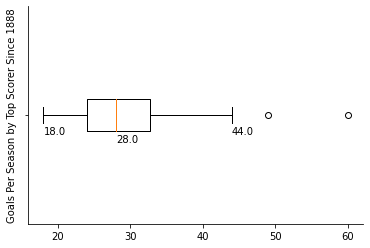

In [6]:
# CS390Z - Introduction to Data Minining - Fall 2021
# Instructor: Thyago Mota
# Author: Antonio Lopez
# Description: Boxplot

import json
import matplotlib.pyplot as plt 

# definitions/parameters
DATA_FOLDER = './data/'
DATASET_NAME = 'goal_count.json'

with open(DATA_FOLDER + DATASET_NAME, 'rt') as json_file:
  data = json.load(json_file)

goals = []
for elements in data:
  goals.append(int(elements['Goals']))

bp = plt.boxplot(
    goals, 
    vert=False
) 
for median in bp['medians']:
  xy = median.get_xydata()[0]
  xy[1] -= .05
  plt.annotate(str(xy[0]), xy=xy)
    
for cap in bp['caps']:
  xy = cap.get_xydata()[0]
  xy[1] -= .05
  plt.annotate(str(xy[0]), xy=xy)

min_whisker = bp['caps'][0].get_xydata()[0][0]
max_whisker = bp['caps'][1].get_xydata()[0][0]   

outliers = []
for elements in data:
  if int(elements['Goals']) < min_whisker or int(elements['Goals']) > max_whisker:
    outliers.append(elements)
print('*** Outliers ***')
for outlier in outliers:
  print(outlier)

axes = plt.gca()
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)
axes.set_yticklabels([''])
plt.ylabel('Goals Per Season by Top Scorer Since 1888')

plt.show()